In [ ]:
# DESCRIPTION

# Consider the ratings dataset below containing data on UserID, MovieID, Rating, and Timestamp. 
# Each line of this file represents one rating of one movie by one user and has the following 
# format: UserID::MovieID::Rating::Timestamp Ratings are made on a 5 star scale with half star increments. 
# UserID: represents the ID of the user MovieID: represents the ID of the movie 
# Timestamp: represents seconds from midnight Coordinated Universal Time (UTC) of January 1, 1970.
# Objective: Predict a movie-movie recommendation model.

In [27]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# DATASET
columns = ['user_id', 'movie_id', 'rating', 'timestamp']
df = pd.read_csv("Recommend.csv", names=columns)
df.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
# sorting by highest avg rating
df.groupby('movie_id')['rating'].mean().sort_values(ascending = False).head()

movie_id
814     5.0
1599    5.0
1201    5.0
1122    5.0
1653    5.0
Name: rating, dtype: float64

In [9]:
# sorting by no of ratings
df.groupby('movie_id')['rating'].count().sort_values(ascending = False).head()

movie_id
50     583
258    509
100    508
181    507
294    485
Name: rating, dtype: int64

In [10]:
# creating seperate dataframe for avg ratings and no of ratings
# 1.adding avg rating col
ratings = pd.DataFrame(df.groupby('movie_id')['rating'].mean())
ratings.head()
# by deafult sorted in asc

,rating
movie_id,
1,3.878319
2,3.206107
3,3.033333
4,3.550239
5,3.302326


In [26]:
# 2.adding no of ratings col
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('movie_id')['rating'].count())
ratings.head()

,rating,num_of_ratings
movie_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86


In [ ]:
# Data Visualization

Text(0, 0.5, 'frequency')

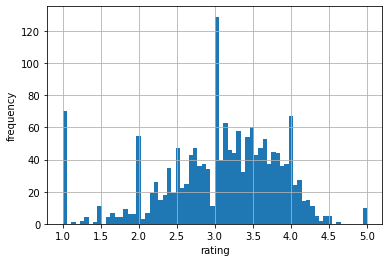

In [24]:
ratings['rating'].hist(bins=70)
plt.xlabel('rating')
plt.ylabel('frequency')

<AxesSubplot:xlabel='num of ratings', ylabel='frequency'>

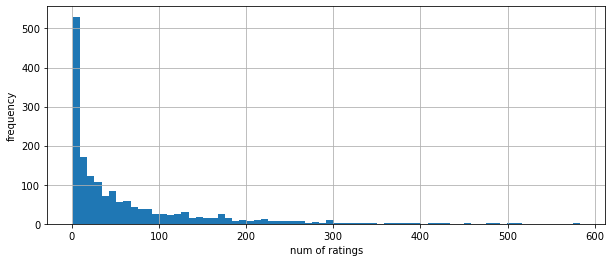

In [25]:
plt.figure(figsize=(10,4))
plt.xlabel('num of ratings')
plt.ylabel('frequency')
ratings['num_of_ratings'].hist(bins = 70)

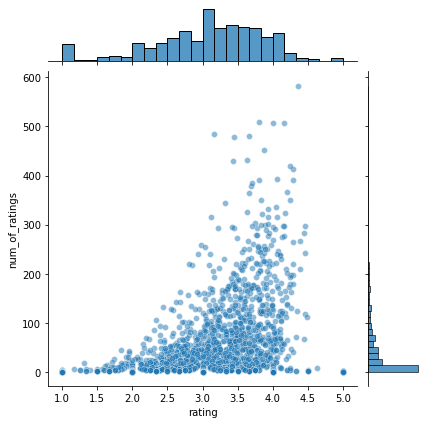

In [29]:
sns.jointplot(x = 'rating', y = 'num_of_ratings', data=ratings, alpha = 0.5)

 # COLLABORATIVE FILTERING  

#### WE NEED TO CREATE USER-RATINGS MATRIX FOR COLLABORATIVE

#### WE USE PIVOT TABLE FOR THAT

In [32]:
movie_matrix = df.pivot_table(index = 'user_id', columns= 'movie_id', values = 'rating')
movie_matrix.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Lets choose top movie which have the most ratings for recommendation
#### we'll find out the recommendation if you watch this movie

In [36]:
# most no of ratings
ratings.sort_values('num_of_ratings', ascending=False).head()

,rating,num_of_ratings
movie_id,,
50,4.358491,583
258,3.803536,509
100,4.155512,508
181,4.007890,507
294,3.156701,485


#### now if you watch movie with id 50 we'll try to figure which movie will be recommended next based on collaborative filtering 

In [40]:
# Lets get the id 50 movie's ratings
movie_50_ratings = movie_matrix[50]
movie_50_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: 50, dtype: float64

#### we can use corrwith() method to get correlations bet. two pandas series

In [45]:
recommend_movie_50 = movie_matrix.corrwith(movie_50_ratings)
recommend_movie_50.head()

/home/mypc/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/mypc/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


movie_id
1    0.180020
2    0.131348
3    0.036925
4    0.259182
5    0.031792
dtype: float64

In [47]:
# convert series to df for sorting and remove na values
recommend_movie_50_df = pd.DataFrame(recommend_movie_50, columns=['Correlation'])

# drop na values
recommend_movie_50_df.dropna(inplace=True)
recommend_movie_50_df.head()

,Correlation
movie_id,
1,0.180020
2,0.131348
3,0.036925
4,0.259182
5,0.031792


In [50]:
# sort with highest corr
recommend_movie_50_df.sort_values('Correlation', ascending=False).head()

,Correlation
movie_id,
1301,1.0
1380,1.0
50,1.0
1541,1.0
1356,1.0


#### now lets filter out the movies with less than 100 reviews

In [51]:
# first lets add no of ratings col in our df
recommend_movie_50_df = recommend_movie_50_df.join(ratings['num_of_ratings'])
recommend_movie_50_df.head()

,Correlation,num_of_ratings
movie_id,,
1,0.180020,452
2,0.131348,131
3,0.036925,90
4,0.259182,209
5,0.031792,86


In [54]:
# now filter less than 100 reviews
recommend_movie_50_df[recommend_movie_50_df['num_of_ratings']>100].sort_values('Correlation', ascending=False).head(10)

,Correlation,num_of_ratings
movie_id,,
50,1.000000,583
172,0.747981,367
181,0.672556,507
174,0.536117,420
249,0.377433,130
194,0.367538,241
210,0.350107,331
404,0.347868,101
123,0.332729,115


### THE FIRST MOVIE TO BE RECOMMENDED WILL BE OF ID 172